<h1 style="text-align:center;font-size:300%;">Sales Analysis</h1>
<h3 style="text-align:center;">by Ruhit Debnath</h3>
 

### Importing Necessary Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
from itertools import combinations
from collections import Counter
import seaborn as sns

###  Merging The Data

In [2]:
df = pd.read_csv('./Sales_data/Sales_April_2019.csv')

all_months_data = pd.DataFrame()
files= [file for file in os.listdir('./Sales_Data')]

for file in files:
    df = pd.read_csv('./Sales_data/'+ file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv('all_data.csv', index=False)


### Reading The Updated Dataframe

In [3]:
df= pd.read_csv('all_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
df.shape

(186850, 6)

In [5]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

### Cleaning the Data

In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
nan_df = df[df.isnull().any(axis=1)]


In [8]:
df =df.dropna(how='all')
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
or_df = df[df['Order Date'].str[0:2] == 'Or']
df = df[df['Order Date'].str[0:2] != 'Or']
or_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])


### Augment Data with Additional Columns

In [11]:
df['Month'] = df['Order Date'].str[0:2]
df['Monthint'] = pd.to_numeric(df['Month'])

df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.month_name()


In [12]:

df = df.sort_values(by="Monthint")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Monthint
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",January,1
70773,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",January,1
70772,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",January,1
70771,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",January,1
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",January,1
...,...,...,...,...,...,...,...,...
47162,311693,27in FHD Monitor,1,149.99,12/06/19 18:05,"594 9th St, Dallas, TX 75001",December,12
47163,311694,AAA Batteries (4-pack),1,2.99,12/19/19 07:35,"905 11th St, Atlanta, GA 30301",December,12
47164,311695,Wired Headphones,1,11.99,12/21/19 21:06,"107 Lakeview St, San Francisco, CA 94016",December,12
47142,311673,USB-C Charging Cable,1,11.95,12/26/19 22:24,"169 Forest St, San Francisco, CA 94016",December,12


In [13]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df[df['Quantity Ordered']>5]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Monthint,Sales
70625,144155,AAA Batteries (4-pack),6,2.99,01/08/19 11:26,"42 Lakeview St, Atlanta, GA 30301",January,1,17.94
71913,145374,AAA Batteries (4-pack),6,2.99,01/23/19 02:25,"275 Highland St, Los Angeles, CA 90001",January,1,17.94
68212,141881,AAA Batteries (4-pack),7,2.99,01/19/19 16:36,"563 Wilson St, Seattle, WA 98101",January,1,20.93
69848,143416,AAA Batteries (4-pack),7,2.99,01/24/19 19:58,"927 Jefferson St, New York City, NY 10001",January,1,20.93
76336,149609,AAA Batteries (4-pack),6,2.99,01/19/19 22:14,"285 Sunset St, San Francisco, CA 94016",January,1,17.94
...,...,...,...,...,...,...,...,...,...
47826,312328,AAA Batteries (4-pack),6,2.99,12/21/19 11:00,"351 Lincoln St, San Francisco, CA 94016",December,12,17.94
48509,312970,AA Batteries (4-pack),6,3.84,12/12/19 10:59,"879 West St, New York City, NY 10001",December,12,23.04
47681,312187,AAA Batteries (4-pack),6,2.99,12/23/19 10:07,"943 Forest St, Los Angeles, CA 90001",December,12,17.94
46509,311064,AA Batteries (4-pack),6,3.84,12/30/19 12:13,"582 River St, San Francisco, CA 94016",December,12,23.04


In [14]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' '+ x.split(',')[2].split(' ')[1])
df['City'].value_counts()

 San Francisco CA    44732
 Los Angeles CA      29605
 New York City NY    24876
 Boston MA           19934
 Atlanta GA          14881
 Dallas TX           14820
 Seattle WA          14732
 Portland OR         10010
 Austin TX            9905
 Portland ME          2455
Name: City, dtype: int64

### <h2> Exploratory Analysis </h2>

### Monthly Sales

In [15]:
total = (df.groupby(df['Monthint'])['Sales'].sum())
total.sort_values()

Monthint
1     1822256.73
9     2097560.13
2     2202022.42
8     2244467.88
6     2577802.26
7     2647775.76
3     2807100.38
5     3152606.75
11    3199603.20
4     3390670.24
10    3736726.88
12    4613443.34
Name: Sales, dtype: float64

In [16]:
monthly_orders= (df.groupby(df['Monthint'])['Product'].count()).sort_values()
monthly_orders

Monthint
1      9709
9     11621
8     11961
2     11975
6     13554
7     14293
3     15153
5     16566
11    17573
4     18279
10    20282
12    24984
Name: Product, dtype: int64

In [17]:
yearly_orders = monthly_orders.sum()
yearly_orders

185950

In [18]:
yearly_sales = total.sum()
yearly_sales

34492035.97

In [19]:
Average_sales = total.mean()
Average_sales

2874336.330833333

In [20]:
small_month_name = df['Month'].str[0:3]
small_month_name

69397    Jan
70773    Jan
70772    Jan
70771    Jan
70770    Jan
        ... 
47162    Dec
47163    Dec
47164    Dec
47142    Dec
43510    Dec
Name: Month, Length: 185950, dtype: object

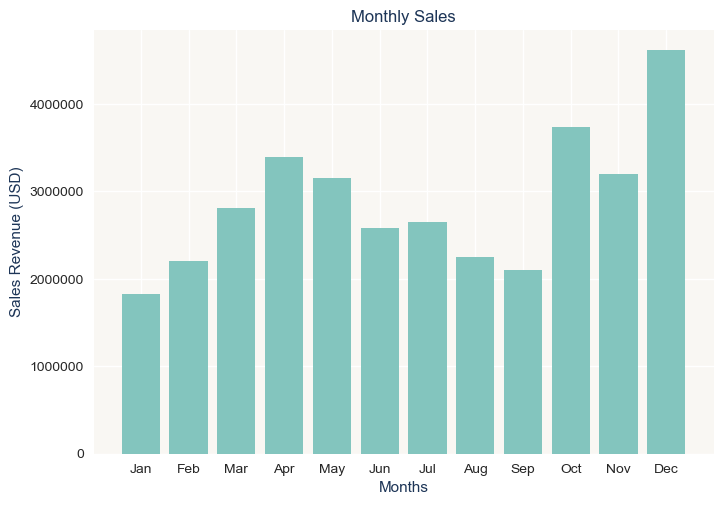

In [21]:
months= small_month_name.unique().tolist()

plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = '#f9f7f3'
plt.bar(months, total, color='#83c5be')

plt.title('Monthly Sales', color='#1d3557')
plt.xlabel('Months',color='#1d3557')
plt.ylabel('Sales Revenue (USD)', color='#1d3557')
plt.xticks(months)

plt.ticklabel_format(axis='y', style='plain')

plt.tight_layout
plt.show()

### City with Highest Sales

In [22]:
city_sales =  (df.groupby('City'))['Sales'].sum()
city_sales

City
 Atlanta GA          2795498.58
 Austin TX           1819581.75
 Boston MA           3661642.01
 Dallas TX           2767975.40
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Portland ME          449758.27
 Portland OR         1870732.34
 San Francisco CA    8262203.91
 Seattle WA          2747755.48
Name: Sales, dtype: float64

In [23]:
city_names = [city for city, df2 in df.groupby('City')]
city_names

[' Atlanta GA',
 ' Austin TX',
 ' Boston MA',
 ' Dallas TX',
 ' Los Angeles CA',
 ' New York City NY',
 ' Portland ME',
 ' Portland OR',
 ' San Francisco CA',
 ' Seattle WA']

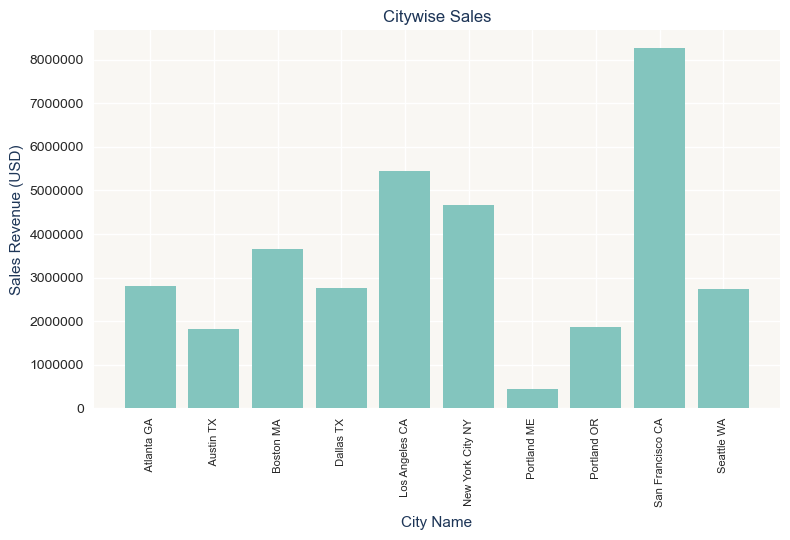

In [24]:
plt.rcParams['axes.facecolor'] = '#f9f7f3'
plt.bar(city_names,city_sales, color='#83c5be')


plt.title('Citywise Sales', color='#1d3557')
plt.xlabel('City Name',color='#1d3557')
plt.ylabel('Sales Revenue (USD)',color='#1d3557')
plt.xticks(city_names, rotation='vertical', size=8)

plt.ticklabel_format(axis='y', style='plain')

plt.tight_layout()

In [25]:
df.sort_values(by=['City'])
df['City'].unique()


array([' Boston MA', ' San Francisco CA', ' Los Angeles CA',
       ' Atlanta GA', ' New York City NY', ' Dallas TX', ' Seattle WA',
       ' Austin TX', ' Portland OR', ' Portland ME'], dtype=object)

In [26]:
city_orders =  (df.groupby('City'))['City'].count()
city_orders

City
 Atlanta GA          14881
 Austin TX            9905
 Boston MA           19934
 Dallas TX           14820
 Los Angeles CA      29605
 New York City NY    24876
 Portland ME          2455
 Portland OR         10010
 San Francisco CA    44732
 Seattle WA          14732
Name: City, dtype: int64

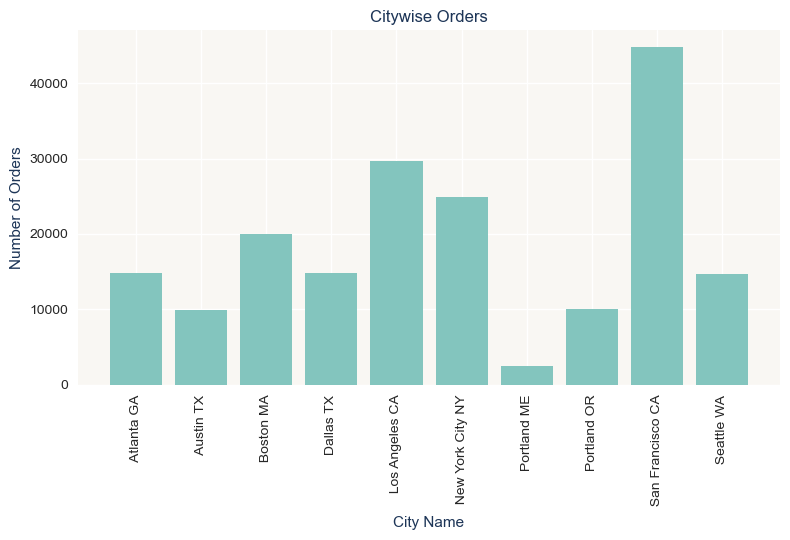

In [27]:
plt.rcParams['axes.facecolor'] = '#f9f7f3'
plt.bar(city_names,city_orders, color='#83c5be')


plt.title('Citywise Orders',color='#1d3557')
plt.xlabel('City Name',color='#1d3557')
plt.ylabel('Number of Orders', color='#1d3557')
plt.xticks(city_names, rotation='vertical', size=10)

plt.ticklabel_format(axis='y', style='plain')

plt.tight_layout()

### Hourly Sales

In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Monthint,Sales,City,Hour
69397,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",January,1,2.99,Boston MA,21
70773,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",January,1,150.00,San Francisco CA,14
70772,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",January,1,389.99,San Francisco CA,19
70771,144298,Lightning Charging Cable,1,14.95,2019-01-13 12:00:00,"709 North St, Los Angeles, CA 90001",January,1,14.95,Los Angeles CA,12
70770,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",January,1,300.00,Atlanta GA,14
...,...,...,...,...,...,...,...,...,...,...,...
47162,311693,27in FHD Monitor,1,149.99,2019-12-06 18:05:00,"594 9th St, Dallas, TX 75001",December,12,149.99,Dallas TX,18
47163,311694,AAA Batteries (4-pack),1,2.99,2019-12-19 07:35:00,"905 11th St, Atlanta, GA 30301",December,12,2.99,Atlanta GA,7
47164,311695,Wired Headphones,1,11.99,2019-12-21 21:06:00,"107 Lakeview St, San Francisco, CA 94016",December,12,11.99,San Francisco CA,21
47142,311673,USB-C Charging Cable,1,11.95,2019-12-26 22:24:00,"169 Forest St, San Francisco, CA 94016",December,12,11.95,San Francisco CA,22


In [29]:
df.groupby('Hour')['Product'].count().sort_values()

Hour
3       831
4       854
2      1243
5      1321
1      2350
6      2482
0      3910
7      4011
8      6256
23     6275
9      8748
22     8822
15    10175
16    10384
17    10899
21    10921
10    10944
14    10984
13    12129
20    12228
18    12280
11    12411
12    12587
19    12905
Name: Product, dtype: int64

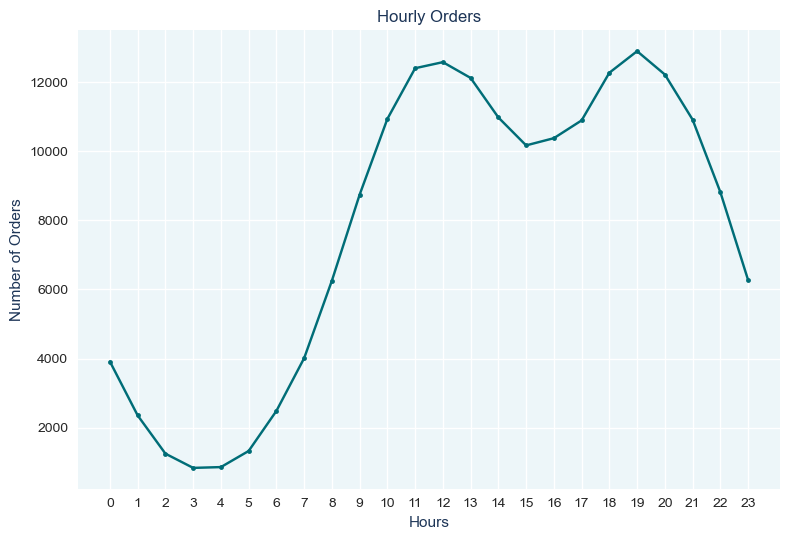

In [30]:
hours = [hour for hour, df2 in df.groupby('Hour')]
hourly_orders = df.groupby('Hour')['Product'].count()
# hourly_sales = df.groupby('Hour')['Sales'].sum()
plt.rcParams['axes.facecolor'] = '#edf6f9'
plt.plot(hours,hourly_orders, linestyle='solid', marker='.', color='#006d77')


plt.title('Hourly Orders', color='#1d3557')
plt.xlabel('Hours',color='#1d3557')
plt.ylabel('Number of Orders',color='#1d3557')
plt.xticks(hours)

plt.tight_layout()

### Proudcts which are sold together most often

In [31]:
%%capture --no-display
df_combo = df[df['Order ID'].duplicated(keep=False)]
df_combo['Grouped'] = df_combo.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_combo = df_combo[['Order ID','Grouped']].drop_duplicates()
df_combo

,Order ID,Grouped
70744,144271,"Lightning Charging Cable,iPhone"
70813,144339,"iPhone,Wired Headphones"
70820,144344,"USB-C Charging Cable,Google Phone"
70870,144394,"Google Phone,Wired Headphones"
71073,144584,"USB-C Charging Cable,Google Phone"
...,...,...
47133,311665,"Google Phone,USB-C Charging Cable"
47116,311650,"Wired Headphones,Google Phone"
47174,311704,"Vareebadd Phone,USB-C Charging Cable"
47187,311715,"Flatscreen TV,AAA Batteries (4-pack)"


In [32]:
count = Counter()

for row in df_combo['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('Lightning Charging Cable', 'iPhone') 525
('USB-C Charging Cable', 'Google Phone') 522
('iPhone', 'Lightning Charging Cable') 490
('Google Phone', 'USB-C Charging Cable') 477
('Wired Headphones', 'iPhone') 253
('Wired Headphones', 'Google Phone') 233
('iPhone', 'Wired Headphones') 209
('USB-C Charging Cable', 'Vareebadd Phone') 198
('iPhone', 'Apple Airpods Headphones') 191
('Google Phone', 'Wired Headphones') 190


### Best Selling Products

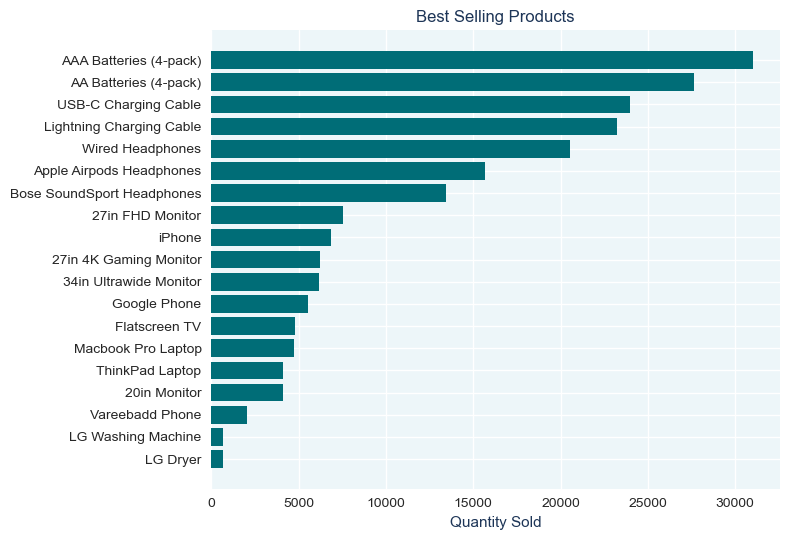

In [33]:
product_group = df.groupby('Product')
quantity = product_group['Quantity Ordered'].sum().sort_values()
product_name = ['LG Dryer','LG Washing Machine','Vareebadd Phone','20in Monitor','ThinkPad Laptop','Macbook Pro Laptop','Flatscreen TV', 'Google Phone', '34in Ultrawide Monitor', '27in 4K Gaming Monitor','iPhone','27in FHD Monitor','Bose SoundSport Headphones', 'Apple Airpods Headphones','Wired Headphones','Lightning Charging Cable', 'USB-C Charging Cable', 'AA Batteries (4-pack)','AAA Batteries (4-pack)']

plt.rcParams['axes.facecolor'] = '#edf6f9'
plt.barh(product_name,quantity, color='#006d77' )


plt.title('Best Selling Products', color='#1d3557')
plt.xlabel('Quantity Sold', color='#1d3557')

plt.tight_layout()

### Relationship Between Sales Quantity and Product Price

In [34]:
product_group['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

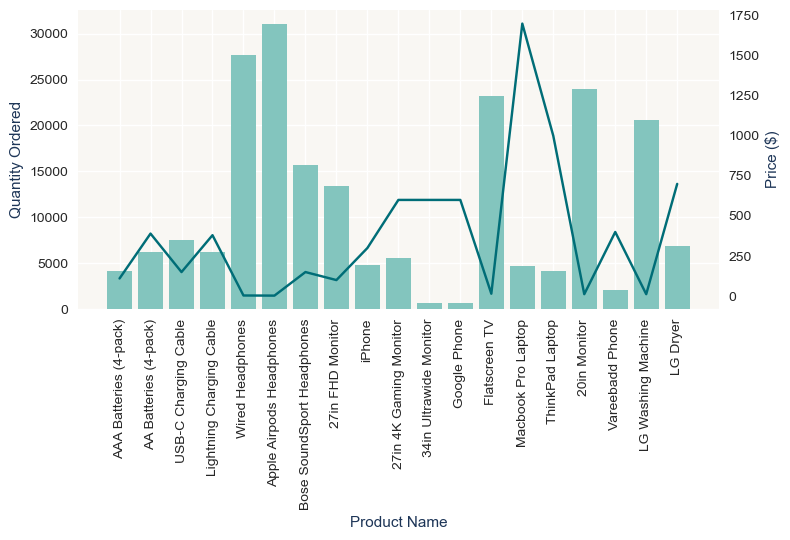

In [35]:
%%capture --no-display  
product_group = df.groupby('Product')
quantity = product_group['Quantity Ordered'].sum()
prices = product_group['Price Each'].mean()

product_name =['AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'USB-C Charging Cable', 'Lightning Charging Cable', 'Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', '27in FHD Monitor', 'iPhone', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Google Phone', 'Flatscreen TV', 'Macbook Pro Laptop', 'ThinkPad Laptop', '20in Monitor', 'Vareebadd Phone', 'LG Washing Machine', 'LG Dryer']

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product_name, quantity, color='#83c5be')
ax2.plot(product_name, prices, '#006d77')

ax1.set_xlabel('Product Name', color='#1d3557')
ax1.set_ylabel('Quantity Ordered', color='#1d3557')

ax2.set_ylabel('Price ($)', color='#1d3557')
ax1.set_xticklabels(product_name, rotation='vertical')

ax1.patch.set_facecolor('#f9f7f3')
plt.grid(False)
plt.tight_layout()

### Contribution of a product in Total Revenue

In [36]:
sale_quantity= product_group['Quantity Ordered'].sum()
Total_sales_per_product = (quantity*prices)
Product_name= Total_sales_per_product.index

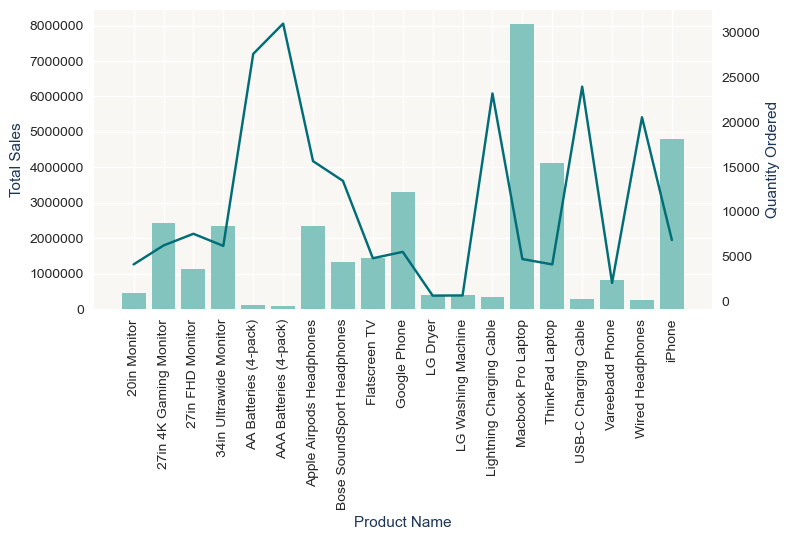

In [37]:
%%capture --no-display
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(Product_name, Total_sales_per_product, color='#83c5be')
ax2.plot(Product_name, sale_quantity, '#006d77')

ax1.set_xlabel('Product Name', color='#1d3557')
ax1.set_ylabel('Total Sales', color='#1d3557')

ax2.set_ylabel('Quantity Ordered', color='#1d3557')
ax1.set_xticklabels(Product_name, rotation='vertical')

ax1.ticklabel_format(axis='y', style='plain')
ax1.patch.set_facecolor('#f9f7f3')
plt.grid(False)
plt.tight_layout()

In [38]:
(quantity*prices)*100/sum(df['Sales'])

Product
20in Monitor                   1.316677
27in 4K Gaming Monitor         7.059884
27in FHD Monitor               3.283148
34in Ultrawide Monitor         6.829281
AA Batteries (4-pack)          0.307661
AAA Batteries (4-pack)         0.268876
Apple Airpods Headphones       6.810703
Bose SoundSport Headphones     3.901090
Flatscreen TV                  4.191402
Google Phone                   9.623091
LG Dryer                       1.123738
LG Washing Machine             1.158528
Lightning Charging Cable       1.006302
Macbook Pro Laptop            23.302771
ThinkPad Laptop               11.973659
USB-C Charging Cable           0.830630
Vareebadd Phone                2.398235
Wired Headphones               0.714595
iPhone                        13.899730
dtype: float64

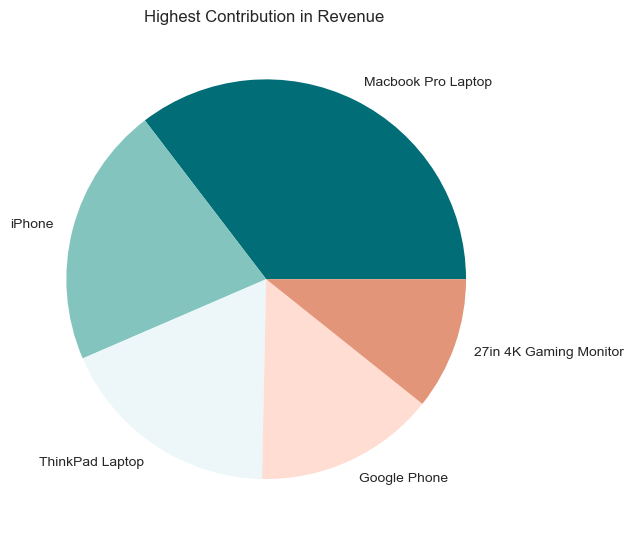

In [39]:
contri = (quantity*prices)*100/sum(df['Sales'])

contri_sorted= contri.sort_values(ascending=False)[:5]
contri_names = contri.sort_values(ascending=False).index[:5]
pie_colors =["#006d77","#83c5be","#edf6f9","#ffddd2","#e29578"]

plt.pie(contri_sorted, labels=contri_names, colors=pie_colors)

plt.title('Highest Contribution in Revenue ')
plt.tight_layout()

### <h2 style="color:#006d77;font-size:250%;"> Summary and Insights </h2>

### <p style="font-size:120%; color:#457b9d;"><b>Quick Stats</b></p>

<ul style="font-size:120%; color:#1d3557">
    <li><b> Total Sales in 2019:</b> 34.49 Million USD </li>
    <li><b> Total Orders in 2019:</b> 185950 </li>
    <li><b> Average Monthly Sales:</b> 2.87 Million USD</li>
    <li><b> Month with Highest Orders & Sales:</b> December (Orders: 24984 , Sales:4.61 Million USD) </li>
    <li><b> Month with Lowest Orders & Sales:</b> January (Orders: 9709 , Sales:1.82 Million USD) </li>
    <li><b> City with Highest Sales:</b> San Fransisco (CA)</li>
    <li><b> Most Ordered Product:</b> AAA Battery (4 Pack)</li>
    <li><b> Product with Highest Revenue Contribution:</b> Macbook Pro Laptop
</ul>

### <p style="font-size:120%; color:#457b9d;"><b>Questions Answered</b></p>

### 1. What was the best month for sales? How much was earned that month? 

<p style="font-size:120%; color:#1d3557">By analysing the dataset it is found that <B> December </B> is the best month for sales both in terms of number of orders and total revenue. In the year 2019 the company has got <b>24984</b> orders and a total revenue of <B>4.6 Million USD</B>.</p>


### 2.  What city sold the most product?

<p style="font-size:120%;  color:#1d3557"> <b> San Francisco (CA)</b> sold the most number of products with <b>44732 </b>orders and total revenue of <B>8.26 Million USD </B>. </p>

### 3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?

<p style="font-size:120%; color:#1d3557">Hourly sales are highest at <b>7 PM</b> and maximum numbers of orders are recieved during two peak periods which are <B>11 AM to 1 PM </B> and <B> 6 PM to 8 PM </B>. These peak hours along with 10 AM to 11 AM and 5 PM to 6 PM when the number of orders start increasing, are the appropriate time to display advertisements in order to maximize the likelyhood of customer's buying product. </p>

### 4. What products are most often sold together?

<p style="font-size:120%; color:#1d3557">Top three product combination which are sold together most ofter are: <br>
<B>1. iPhone and Lightning Charging Cable <br>
   2. Google Phone and USB-C Charger<br>
   3. iPhone and Wired Headphones</B> <br><br>
Moreover these two 3-Product combinations are sold together most often: <br>
<b> 1. Google Phone, USB-C Charging Cable, Wired Headphones <br>
    2. iPhone, lightning Charging Cable, Wired Headphone <br> </b></p>
    
<p style="font-size:120%; color:#1d3557">So in short Phone, charging cable and headphones are sold together most often.</p>

### 5. What product sold the most? Why do you think it sold the most?

<p style="font-size:120%; color:#1d3557"> Top 5 best selling products are: <br><br>
        <b>   1. AAA Batteries (4-pack)</b>- 2.99 USD <br>
        <b>   2. AA Batteries (4-pack)</b>- 3.84 USD <br>
        <b>   3. USB-C Charging Cable</b> - 11.95 USD <br>
        <b>   4. Lightning Charging Cable</b> - 14.95 USD <br>
        <b>   5. Wired Headphones</b>- 11.99 USD  <br></p>

<p style="font-size:120%; color:#1d3557">From this list it is clearly seen that the products which has the highest number of orders re also the products with the lowest prices.Therefore ususally products with lower price and lower product life are sold most often. </p>

### <p style="font-size:120%; color:#457b9d;"><b>Insights</b></p>

<ul style="font-size:120%; color:#1d3557">
    <li>Last 3 Months of the year has a <b>25%</b> higher average sales than the average yearly sales.</li><br>
    <li>The city of <b>San Francisco (CA)</b> alone accounts for the <b>24%</b> of the total sales.</li><br>
    <li>Only San Francisco, Los Angeles and New York City has yearly sales of more than <b>4 Million USD.</b></li><br>
    <li><b>40%</b> of the orders come during the peak hours i.e. <b>11AM-1PM and 6PM - 8PM.</b></li><br>
    <li><b>AAA and AA Batteries</b> are the only products which are brought in high quantites (more than 5). </li><br>
    <li>For a product, number of orders is almost <b>inversely proportional</b> to its price. </li><br>
    <li>Top 5 highest selling products only contribute <b>3%</b> on the Total Revenue </li><br>
    <li>Almost <b>50%</b> of Total Revenue comes from only three products - <b>Macbook Pro Laptop, iPhone and ThinkPad Laptop.</b></li><br>
</ul>